In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
Athletes = pd.read_excel("Athletes.xlsx")
Gender = pd.read_excel("EntriesGender.xlsx")
Medals=pd.read_excel("Medals.xlsx")

In [4]:
#Empezaremos analizando el Dataset Athletes

In [5]:
#Podemos apreciar que existen 3 columnas Name, NOC, Discipline de tipo object las 3.
Athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [6]:
#Revisemos la forma del Dataframe, es decir, por cuantas filas y columnas está compuesto.
Athletes.shape

(11085, 3)

In [7]:
#Revisemos cuantos valores nulos contiene por columna.
Athletes.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

In [8]:
#Echemos un vistazo a los registros del Dataframe.
Athletes.sample(10)

,Name,NOC,Discipline
2061,da SILVA COSTA Thalita,Brazil,Rugby Sevens
10699,WU Josephine,Canada,Badminton
4943,KLESHCHENKO Evgeny,ROC,Cycling BMX Racing
7483,PASZTOR Matyas,Hungary,Water Polo
7596,PEREZ Marta,Spain,Athletics
10020,VALDEZ Jayson,Philippines,Shooting
2479,DRUNCEA Daniela,Romania,Rowing
8484,SAKAI Natsumi,Japan,Swimming
1738,CHEW Phillip,United States of America,Badminton
6135,MATLA Frederique,Netherlands,Hockey


In [9]:
#Revisemos si existen registros duplicados.
Athletes.duplicated().sum()

1

In [10]:
#Al parecer existe un registro duplicado, verifiquemoslo.
Athletes[Athletes.duplicated(keep=False)]

,Name,NOC,Discipline
253,ALI Mohamed,Bahrain,Handball
254,ALI Mohamed,Bahrain,Handball


In [11]:
# Encontramos que los registros 253 y 254 son iguales, se procederá a eliminar el segundo.
Athletes.drop_duplicates(keep='first', inplace=True)

In [12]:
#Volvemos a verificar que los cambios se hayan efectuado
Athletes.duplicated().sum()

0

In [13]:
#Estamos seguros de que ya no tenemos registros duplicados, revisemos la forma del Dataset
Athletes.shape

(11084, 3)

In [14]:
Athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11084 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11084 non-null  object
 1   NOC         11084 non-null  object
 2   Discipline  11084 non-null  object
dtypes: object(3)
memory usage: 346.4+ KB


In [15]:
#Verificamos en cuantas disciplinas participa cada país
Athletes.groupby(['NOC'])[['Discipline']].nunique().sort_values(by=['Discipline'],ascending=False)

,Discipline
NOC,
Japan,46
United States of America,44
Australia,41
People's Republic of China,41
France,41
...,...
Tuvalu,1
Lesotho,1
Saint Kitts and Nevis,1


In [16]:
#Nos vamos a quedar con los 30 países que participan en más disciplinas
CountryTop = Athletes.groupby(['NOC'])[['Discipline']].nunique().sort_values(by=['Discipline'],ascending=False).reset_index().head(30)
CountryTop

,NOC,Discipline
0,Japan,46
1,United States of America,44
2,Australia,41
3,People's Republic of China,41
4,France,41
5,Canada,40
6,ROC,39
7,Italy,39
8,Germany,37
9,Spain,36


In [17]:
#Reiniciamos el index
CountryTop.reset_index()

,index,NOC,Discipline
0,0,Japan,46
1,1,United States of America,44
2,2,Australia,41
3,3,People's Republic of China,41
4,4,France,41
5,5,Canada,40
6,6,ROC,39
7,7,Italy,39
8,8,Germany,37
9,9,Spain,36


In [18]:
CountryTop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOC         30 non-null     object
 1   Discipline  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [19]:
import matplotlib.colors as mcolors
cmap = mcolors.ListedColormap(["w", "grey", "green", "red"])
cmap.colors

['w', 'grey', 'green', 'red']

Text(0.5, 1.0, 'Cantidad de Disciplinas por País')

<Figure size 432x288 with 0 Axes>

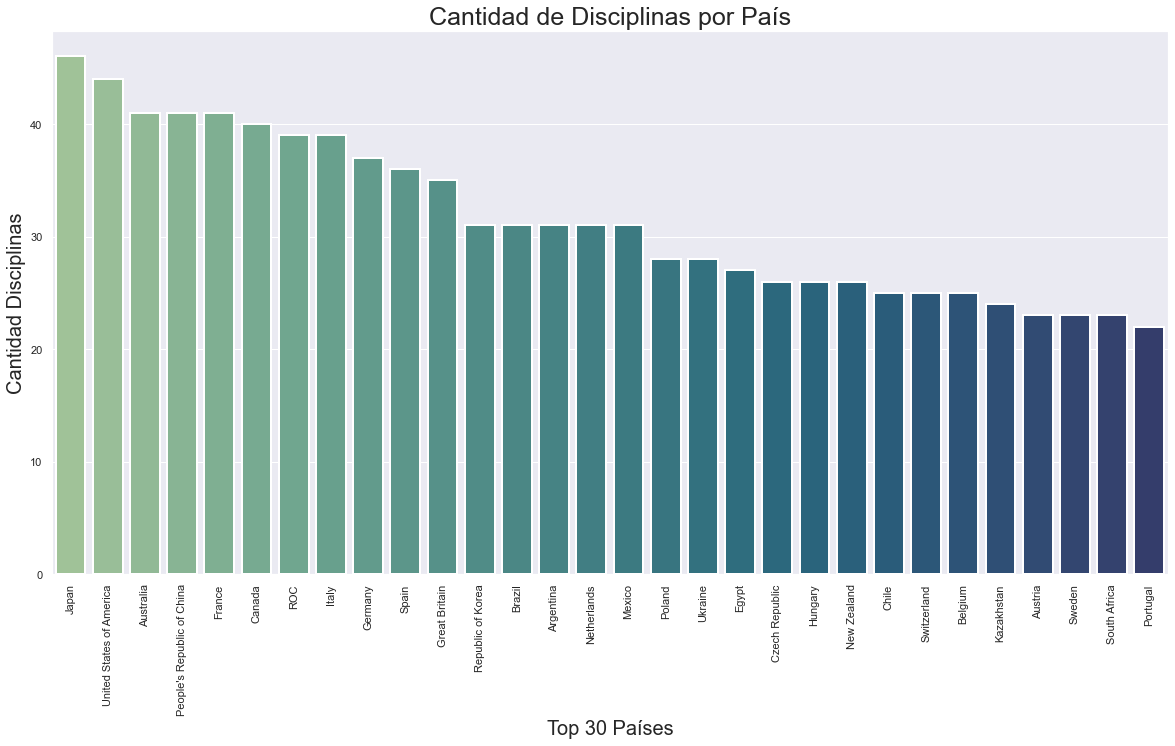

In [20]:
#Representamos el set de datos obtenido un una gráfica de barras.
plt.figure()
plt.figure(figsize=(20,10))
sns.set(rc=None)
sns.barplot(x=CountryTop['NOC'],y=CountryTop['Discipline'],
           linewidth=2,
           palette=sns.color_palette("crest", n_colors=30))
plt.xticks(rotation=90)
plt.xlabel('Top 30 Países', fontsize=20)
plt.ylabel('Cantidad Disciplinas', fontsize=20)
plt.title('Cantidad de Disciplinas por País', fontsize =25)


In [21]:
#Extraemos los países con participación en más disciplinas.
CountryTop5=Athletes[(Athletes['NOC']=='Japan') | (Athletes['NOC']=='United States of America') | 
                     (Athletes['NOC']=='Australia') | (Athletes['NOC']=="People's Republic of China") |
                     (Athletes['NOC']=='France')]
CountryTop5

,Name,NOC,Discipline
5,ABALO Luc,France,Handball
11,ABBOT Emily,Australia,Rhythmic Gymnastics
12,ABBOTT Monica,United States of America,Baseball/Softball
29,ABDIRAHMAN Abdi,United States of America,Athletics
43,ABE Hifumi,Japan,Judo
...,...,...,...
11046,ZHU Yaming,People's Republic of China,Athletics
11047,ZHU Yu,People's Republic of China,Football
11052,ZIEMEK Zachery,United States of America,Athletics
11068,ZOLOTIC Anastasija,United States of America,Taekwondo


In [22]:
CountryTop5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2449 entries, 5 to 11071
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        2449 non-null   object
 1   NOC         2449 non-null   object
 2   Discipline  2449 non-null   object
dtypes: object(3)
memory usage: 76.5+ KB


In [23]:
Top5 = CountryTop5.groupby(['NOC','Discipline']).count().sort_values(by=['NOC','Discipline'], ascending=True).reset_index()
Top5

,NOC,Discipline,Name
0,Australia,Archery,2
1,Australia,Artistic Gymnastics,2
2,Australia,Artistic Swimming,7
3,Australia,Athletics,65
4,Australia,Badminton,4
...,...,...,...
208,United States of America,Triathlon,5
209,United States of America,Volleyball,22
210,United States of America,Water Polo,25
211,United States of America,Weightlifting,8


In [24]:
Top5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NOC         213 non-null    object
 1   Discipline  213 non-null    object
 2   Name        213 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


<AxesSubplot:xlabel='NOC', ylabel='Name'>

<Figure size 432x288 with 0 Axes>

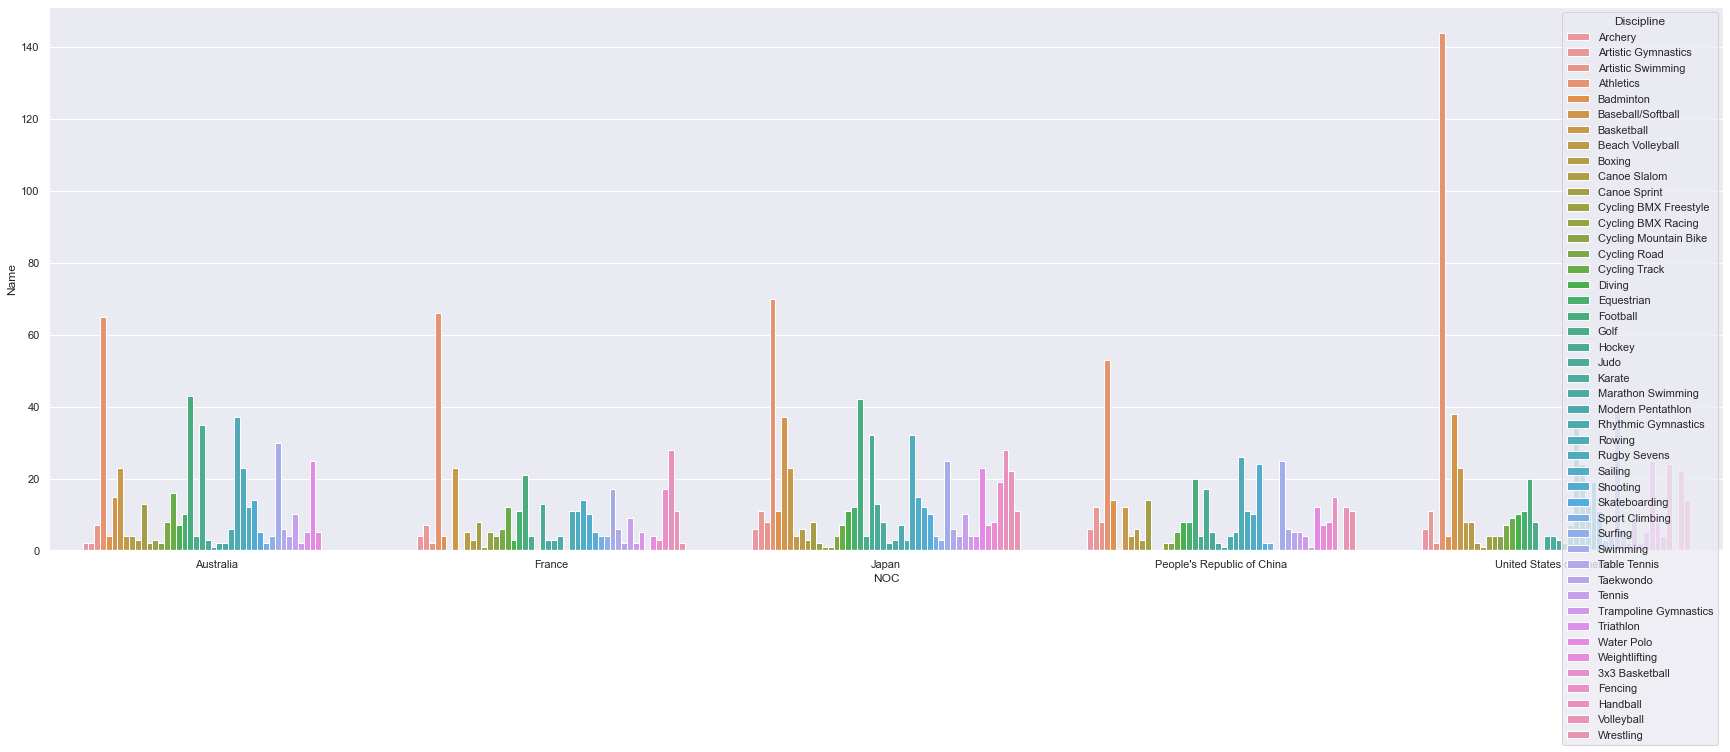

In [25]:
#Graficamos en un barplot la magnitud de participaciones por país.
plt.figure()
plt.figure(figsize=(30,10))
sns.set(rc=None)
sns.barplot(x=Top5['NOC'],y=Top5['Name'], hue=Top5['Discipline'])

In [26]:
#Obtenemos la cantidad de participantes por disciplina.
Atlet = Athletes.groupby('Discipline').count().reset_index()
Atlet

,Discipline,Name,NOC
0,3x3 Basketball,62,62
1,Archery,122,122
2,Artistic Gymnastics,187,187
3,Artistic Swimming,98,98
4,Athletics,2068,2068
5,Badminton,164,164
6,Baseball/Softball,220,220
7,Basketball,280,280
8,Beach Volleyball,90,90
9,Boxing,270,270


<Figure size 432x288 with 0 Axes>

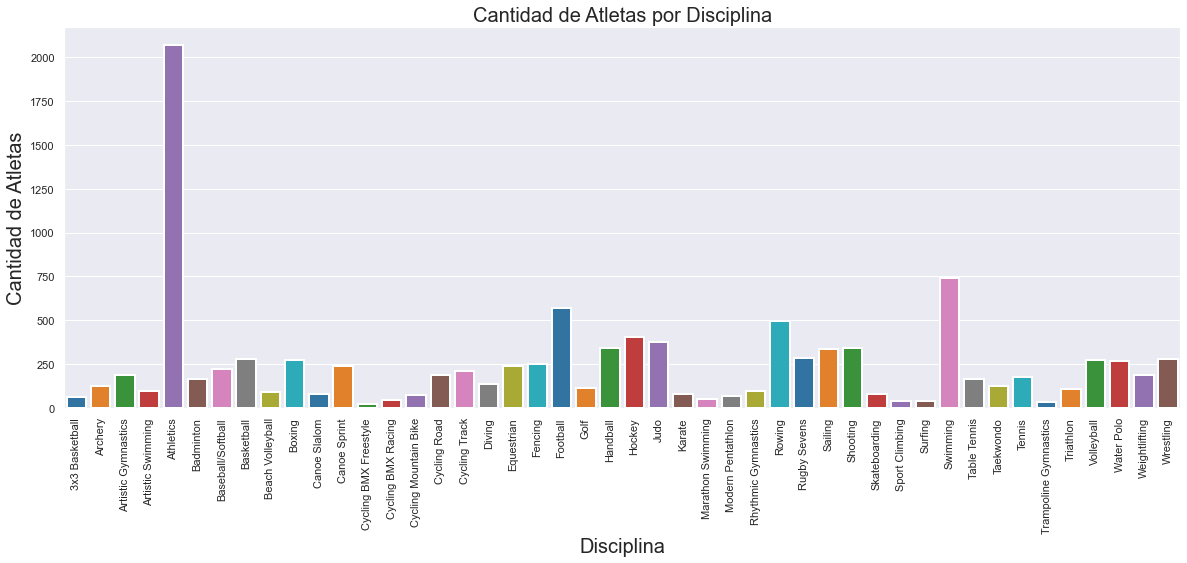

In [27]:
plt.figure()
plt.figure(figsize=(20,7))
sns.barplot(x=Atlet['Discipline'], y=Atlet['Name'],
            linewidth=2,
            palette=sns.color_palette("tab10"))
plt.xticks(rotation=90)
plt.xlabel("Disciplina", fontsize=20)
plt.ylabel('Cantidad de Atletas', fontsize=20)
plt.title('Cantidad de Atletas por Disciplina', fontsize=20)
plt.show()

In [28]:
#Vamos a trabajar con la bas de daros Gender.
Gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [29]:
Gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [30]:
#Verificamos que no existan valores nulos.
Gender.isnull().sum()

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

In [31]:
#Verificamos que no existan registros duplicados
Gender.duplicated().sum()

0

<Figure size 432x288 with 0 Axes>

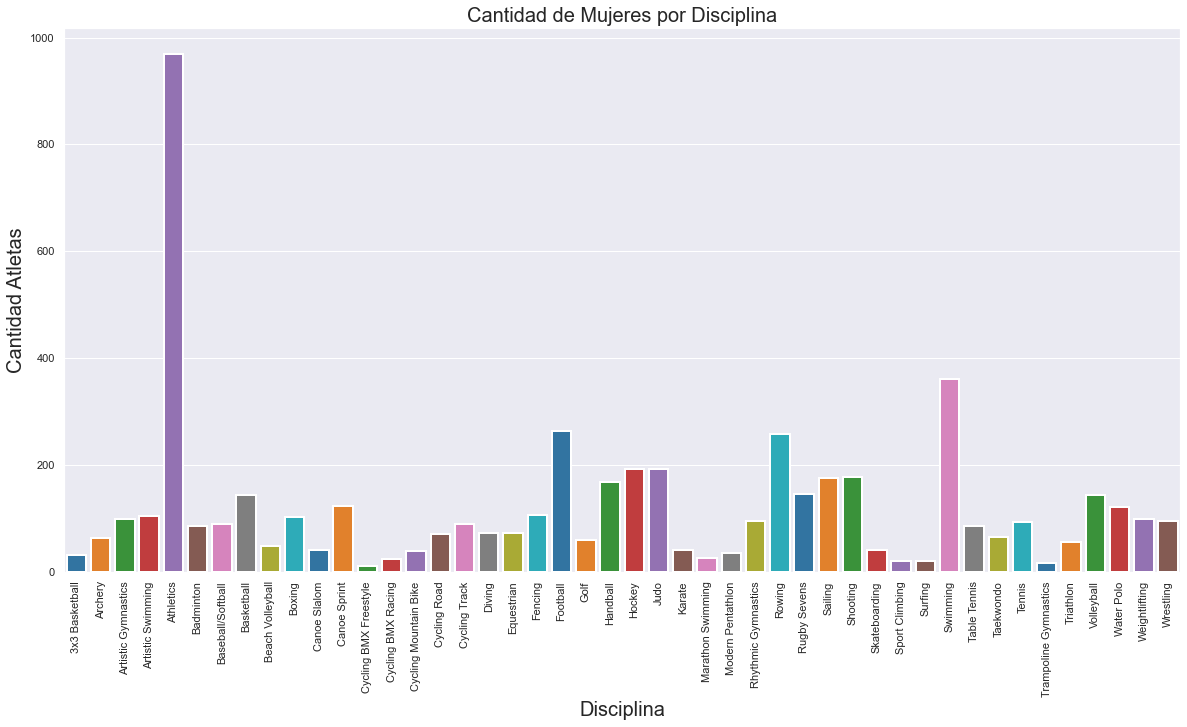

In [32]:
# Procedemos a graficar en un gráfico de barras la cantidad de mujeres por Disciplina
plt.figure()
plt.figure(figsize=(20,10))
sns.set(rc=None)
sns.barplot(x=Gender['Discipline'],y=Gender['Female'],
            linewidth=2,
           palette=sns.color_palette("tab10"))
plt.xticks(rotation=90)
plt.xlabel('Disciplina', fontsize=20)
plt.ylabel('Cantidad Atletas', fontsize=20)
plt.title('Cantidad de Mujeres por Disciplina', fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

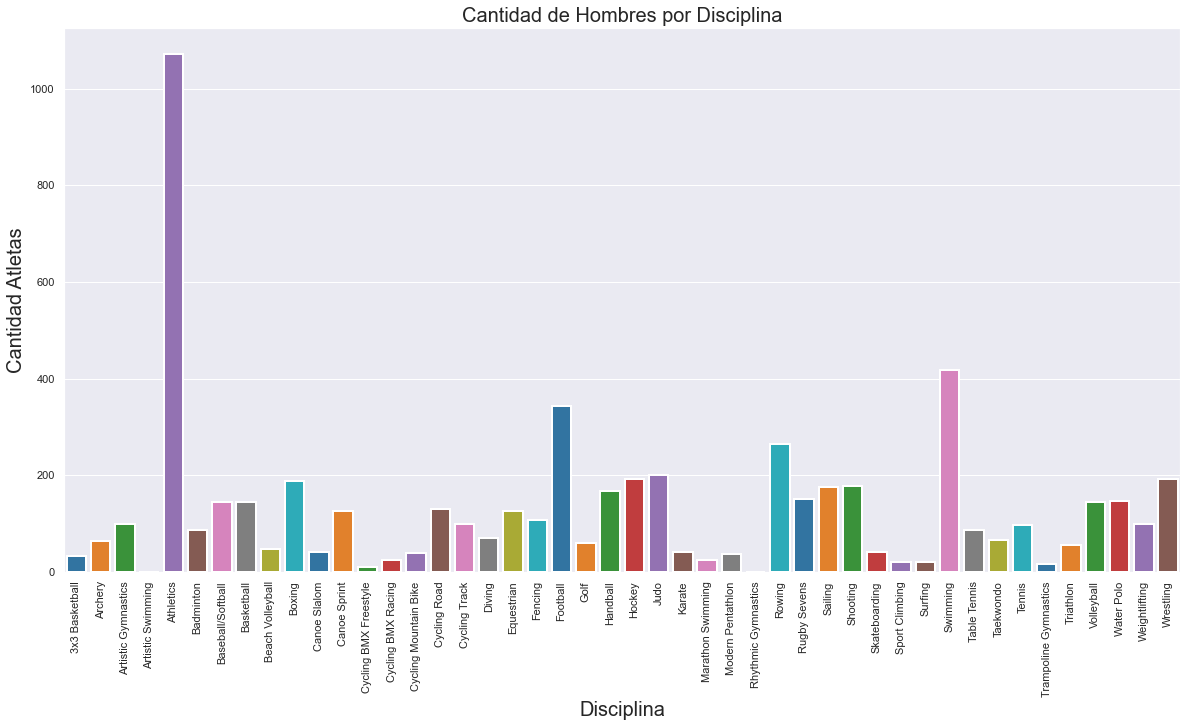

In [33]:
# Procedemos a graficar en un gráfico de barras la cantidad de hombres por Disciplina
plt.figure()
plt.figure(figsize=(20,10))
sns.set(rc=None)
sns.barplot(x=Gender['Discipline'],y=Gender['Male'],
            linewidth=2,
           palette=sns.color_palette("tab10"))
plt.xticks(rotation=90)
plt.xlabel('Disciplina', fontsize=20)
plt.ylabel('Cantidad Atletas', fontsize=20)
plt.title('Cantidad de Hombres por Disciplina', fontsize=20)
plt.show()

<Figure size 432x288 with 0 Axes>

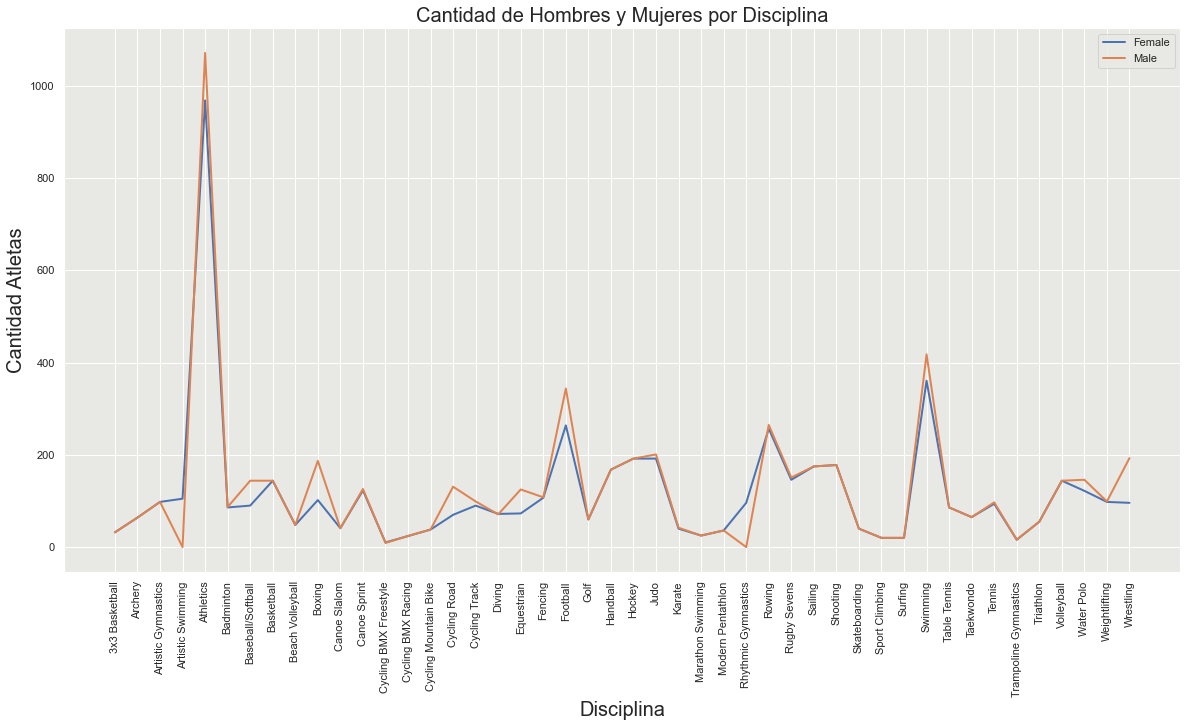

In [34]:
#Cantidad de mujeres y hombres por disciplina
plt.figure()
plt.figure(figsize=(20,10))
sns.set(rc={'axes.facecolor':'#e8e8e4','axes.grid':True})
sns.lineplot(x=Gender['Discipline'], y=Gender['Female'],linewidth=2,
             label='Female')
sns.lineplot(x=Gender['Discipline'], y=Gender['Male'],linewidth=2,
             label='Male')
plt.xticks(rotation=90)
plt.xlabel('Disciplina', fontsize=20)
plt.ylabel('Cantidad Atletas', fontsize=20)
plt.title('Cantidad de Hombres y Mujeres por Disciplina', fontsize=20)
plt.show()

In [35]:
#Trabajemos con el set de datos Medals
Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [36]:
Medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [37]:
Medals.shape

(93, 7)

In [38]:
Medals.isnull().sum()

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

In [39]:
Medals.duplicated().sum()

0

In [40]:
Medals.sample(10)

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
25,26,Croatia,3,3,2,8,29
63,63,Morocco,1,0,0,1,77
38,39,Ireland,2,0,2,4,47
15,16,Republic of Korea,6,4,10,20,13
0,1,United States of America,39,41,33,113,1
84,85,Finland,0,0,2,2,66
10,11,Canada,7,6,11,24,11
53,54,Egypt,1,1,4,6,39
74,74,Malaysia,0,1,1,2,66
39,39,Israel,2,0,2,4,47


<Figure size 432x288 with 0 Axes>

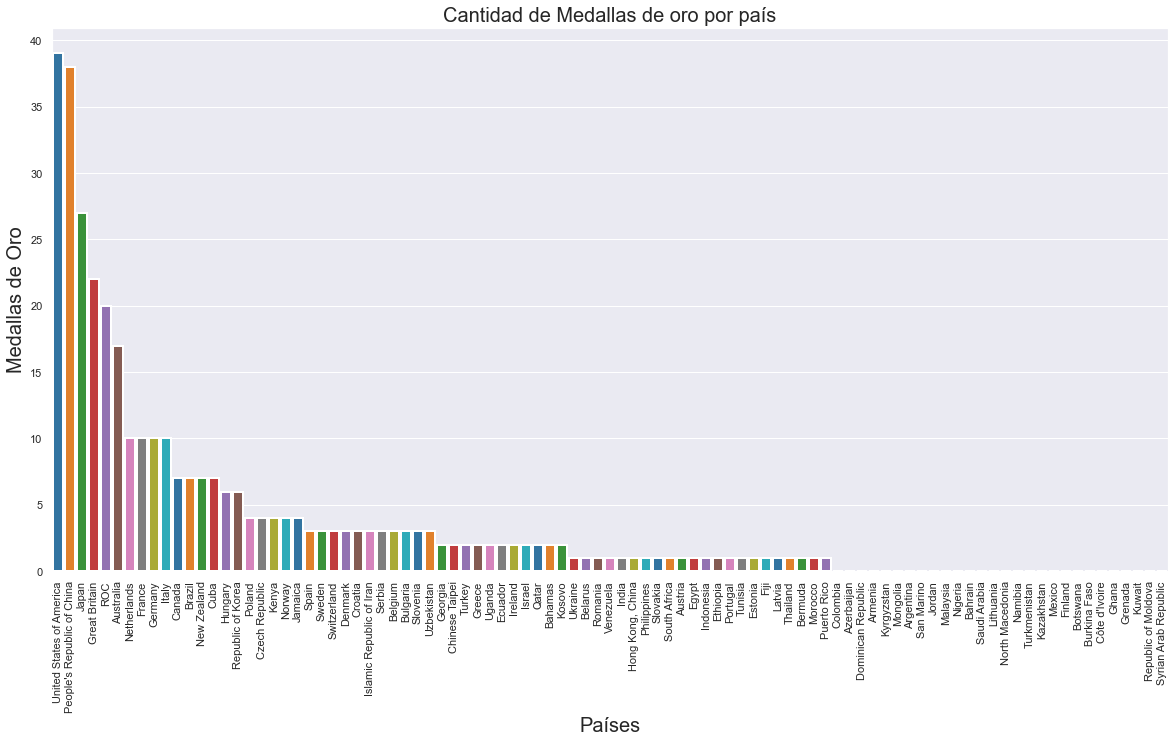

In [45]:
#Que país obtuvo mas medallas de oro
plt.figure()
plt.figure(figsize=(20,10))
sns.set(rc=None)
sns.barplot(x=Medals['Team/NOC'], y=Medals['Gold'],
            linewidth=2,
           palette=sns.color_palette("tab10"))
plt.xticks(rotation=90)
plt.xlabel('Países', fontsize=20)
plt.ylabel('Medallas de Oro', fontsize=20)
plt.title('Cantidad de Medallas de oro por país', fontsize=20)
plt.show()